In [1]:
#importing the libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Function implementing Census Transform
def Census_Transform(limg, rimg,disp_Max,M):
    h,w = limg.shape
    disp_map = np.zeros((h,w))

    for i in range(disp_Max + int(M/2),h-disp_Max - int(M/2)):
        for j in range(disp_Max + int(M/2) ,w - disp_Max - int(M/2)):
            bitvector = []
            lwin = limg[i-int(M/2):i+int(M/2)+1,j-int(M/2):j+int(M/2)+1]
            blwin = np.ravel((lwin>limg[i,j])*1)

            for d in range(disp_Max+1):
                rwin = rimg[i-int(M/2):i+int(M/2)+1,j-d-int(M/2):j-d+int(M/2)+1]
                brwin = np.ravel((rwin>rimg[i,j-d])*1)
                bitvector.append(sum(blwin^brwin))
            disp_map[i,j] = np.argmin(bitvector)
      
    disp_map = disp_map.astype(np.uint8)
    disp_map_norm = ((disp_map/disp_map.max())*255).astype('uint8')
    return disp_map


In [3]:
#Function to calculate the error between the ground disparity map and the calculated disparity map
def error(og_disp_map,disp_map,delta,disp_Max,M):
    h,w = disp_map.shape
    err = disp_map[disp_Max + int(M/2):h-disp_Max - int(M/2),disp_Max + int(M/2) :w - disp_Max - int(M/2)] - og_disp_map[disp_Max + int(M/2):h-disp_Max - int(M/2),disp_Max + int(M/2) :w - disp_Max - int(M/2)]
    print(err.min())
    print(err.max())
    ch1 = (err<=delta)*255
    ch1 = ch1.astype('uint8')
    return ch1
    
    
    

In [4]:
#Wrapper function for the above two function
def comb(limg, rimg,disp_Max,M,og_disp_map,delta):
    disp_map = Census_Transform(limg, rimg,og_disp_map_max, M)
    b = error(og_disp_map,disp_map,delta,disp_Max,M)
    N = np.count_nonzero(og_disp_map)
    d = np.count_nonzero(b)/N
    print(d*100)
    f = plt.figure(figsize=(15,4.5))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.axis('off')
    ax2.axis('off')

    ax1.imshow(disp_map,cmap='gray')
    ax2.imshow(b,cmap='gray')    
    

In [5]:
#Reading the images and their corresponding disparity maps
og_disp_map_a = cv2.imread("Task3Images/disp2.png",cv2.IMREAD_GRAYSCALE)
og_disp_map_b= og_disp_map_a.astype('float32')/4.0
og_disp_mapi = og_disp_map_b.astype('uint8')
og_disp_map_max = og_disp_mapi.max()
limg = cv2.imread("Task3Images/im2.png",cv2.IMREAD_GRAYSCALE)
rimg = cv2.imread("Task3Images/im6.png",cv2.IMREAD_GRAYSCALE)

In [6]:
og_disp_map_max 

52

0
255
41.08888136249274


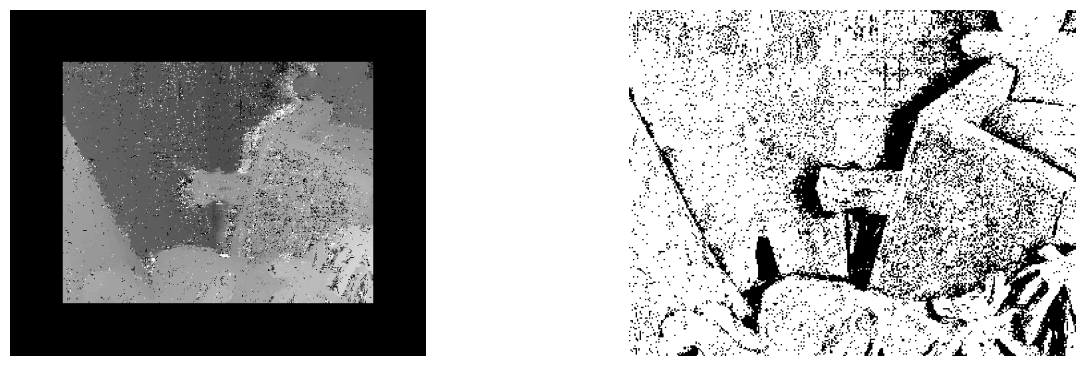

In [7]:
#For window size 10
window_size = 10
comb(limg, rimg,og_disp_map_max, window_size,og_disp_mapi,2)

0
255
40.77680472227598


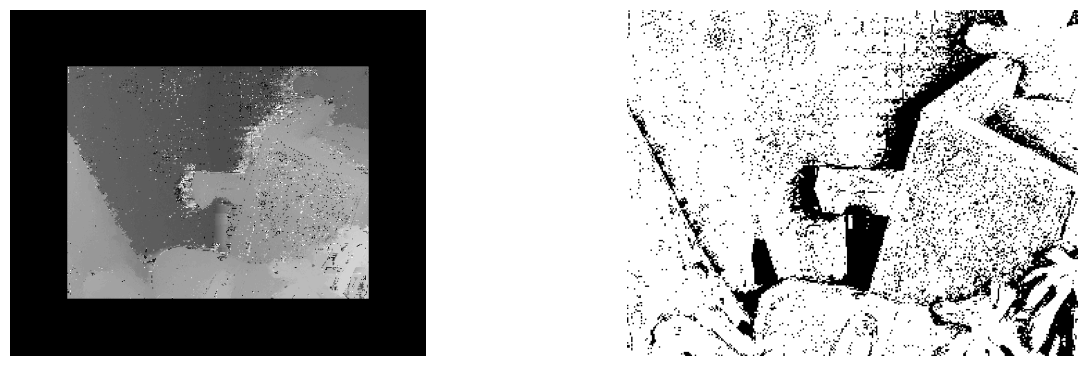

In [8]:
#For window size 20
window_size = 20
comb(limg, rimg,og_disp_map_max, window_size,og_disp_mapi,2)

0
255
38.10359009096187


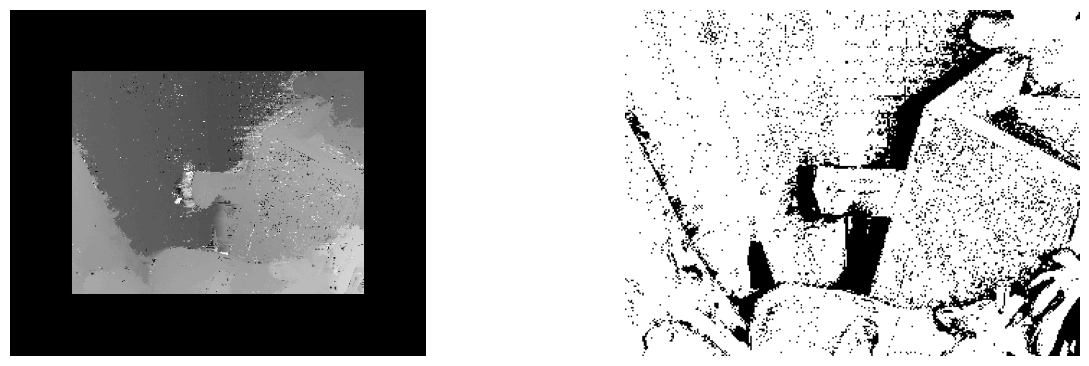

In [9]:
#For window size 30
window_size = 30
comb(limg, rimg,og_disp_map_max, window_size,og_disp_mapi,2)